<a href="https://colab.research.google.com/github/mohammadreza-mohammadi94/DataAnalysis-And-MachineLearning/blob/master/3.%20Risk%20Management%20and%20Financial%20Analysis/Insurance%20Claims%20Classification/Insurrance_Claim_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Connection To Kaggle <a id=1></a>
_To Download Dataset_

In [83]:
# from google.colab import userdata
# import os

# os.environ["KAGGLE_PASS"] = userdata.get('KAGGLE_PASS')
# os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

# !kaggle datasets download -d litvinenko630/insurance-claims

# !unzip insurance-claims.zip

# 2. Import Libraries <a id=2></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 3. Import Dataset <a id=3></a>

In [7]:
df = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/ML/Colab_ML/Insurance claims data.csv")

In [8]:
df.head(5)

,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,POL045360,9.3,1.2,41,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
1,POL016745,8.2,1.8,35,C2,27003,C1,M9,Diesel,200Nm@1750rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
2,POL007194,9.5,0.2,44,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
3,POL018146,5.2,0.4,44,C10,73430,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
4,POL049011,10.1,1.0,56,C13,5410,B2,M5,Diesel,200Nm@3000rpm,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0


# 4. Check Dataset <a id=4></a>

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   subscription_length               58592 non-null  float64
 2   vehicle_age                       58592 non-null  float64
 3   customer_age                      58592 non-null  int64  
 4   region_code                       58592 non-null  object 
 5   region_density                    58592 non-null  int64  
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   max_torque                        58592 non-null  object 
 10  max_power                         58592 non-null  object 
 11  engine_type                       58592 non-null  object 
 12  airb

## 4.1 Getting to Know the Variables <a id=4.1></a>


| #  | Column                            | Description                                                              | Dtype   |
|----|------------------------------------|--------------------------------------------------------------------------|---------|
| 0  | policy_id                         | Unique identifier for each insurance policy                               | object  |
| 1  | subscription_length               | Duration of the insurance policy (in months/years)                        | float64 |
| 2  | vehicle_age                       | Age of the vehicle (in years)                                             | float64 |
| 3  | customer_age                      | Age of the customer                                                       | int64   |
| 4  | region_code                       | Code representing the customer’s region                                   | object  |
| 5  | region_density                    | Population density of the customer’s region                               | int64   |
| 6  | segment                           | Segment/class of the vehicle (e.g., economy, luxury)                      | object  |
| 7  | model                             | Model of the vehicle                                                      | object  |
| 8  | fuel_type                         | Type of fuel used by the vehicle (e.g., petrol, diesel)                   | object  |
| 9  | max_torque                        | Maximum torque of the vehicle                                             | object  |
| 10 | max_power                         | Maximum power output of the vehicle                                       | object  |
| 11 | engine_type                       | Type of engine the vehicle has (e.g., turbocharged)                       | object  |
| 12 | airbags                           | Number of airbags in the vehicle                                          | int64   |
| 13 | is_esc                            | Whether the vehicle has Electronic Stability Control (ESC)                | object  |
| 14 | is_adjustable_steering            | Whether the vehicle has adjustable steering                               | object  |
| 15 | is_tpms                           | Whether the vehicle has a Tire Pressure Monitoring System (TPMS)          | object  |
| 16 | is_parking_sensors                | Whether the vehicle has parking sensors                                   | object  |
| 17 | is_parking_camera                 | Whether the vehicle has a parking camera                                  | object  |
| 18 | rear_brakes_type                  | Type of rear brakes (e.g., drum, disc)                                    | object  |
| 19 | displacement                      | Engine displacement (measured in cubic centimeters)                       | int64   |
| 20 | cylinder                          | Number of cylinders in the engine                                         | int64   |
| 21 | transmission_type                 | Type of transmission (e.g., automatic, manual)                            | object  |
| 22 | steering_type                     | Type of steering system (e.g., power steering)                            | object  |
| 23 | turning_radius                    | Turning radius of the vehicle (in meters)                                 | float64 |
| 24 | length                            | Length of the vehicle                                                     | int64   |
| 25 | width                             | Width of the vehicle                                                      | int64   |
| 26 | gross_weight                      | Gross weight of the vehicle                                               | int64   |
| 27 | is_front_fog_lights               | Whether the vehicle has front fog lights                                  | object  |
| 28 | is_rear_window_wiper              | Whether the vehicle has a rear window wiper                               | object  |
| 29 | is_rear_window_washer             | Whether the vehicle has a rear window washer                              | object  |
| 30 | is_rear_window_defogger           | Whether the vehicle has a rear window defogger                            | object  |
| 31 | is_brake_assist                   | Whether the vehicle has a brake assist system                             | object  |
| 32 | is_power_door_locks               | Whether the vehicle has power door locks                                  | object  |
| 33 | is_central_locking                | Whether the vehicle has a central locking system                          | object  |
| 34 | is_power_steering                 | Whether the vehicle has power steering                                    | object  |
| 35 | is_driver_seat_height_adjustable  | Whether the driver’s seat height is adjustable                            | object  |
| 36 | is_day_night_rear_view_mirror     | Whether the vehicle has a day-night adjustable rearview mirror            | object  |
| 37 | is_ecw                            | Whether the vehicle has emergency collision warning                       | object  |
| 38 | is_speed_alert                    | Whether the vehicle has a speed alert system                              | object  |
| 39 | ncap_rating                       | Safety rating of the vehicle from NCAP (New Car Assessment Program)       | int64   |
| 40 | claim_status                      | Status of the insurance claim (e.g., whether a claim has been filed)      | int64   |


## 4.2 Check Missing Values <a id=4.2></a>

In [10]:
pd.DataFrame(df.isnull().sum(), columns=['Missing Value Count'])

,Missing Value Count
policy_id,0
subscription_length,0
vehicle_age,0
customer_age,0
region_code,0
region_density,0
segment,0
model,0
fuel_type,0
max_torque,0


In [11]:
df.duplicated().sum()

0

## 4.3 Check Datatypes <a id=4.3></a>

In [12]:
df.dtypes

,0
policy_id,object
subscription_length,float64
vehicle_age,float64
customer_age,int64
region_code,object
region_density,int64
segment,object
model,object
fuel_type,object
max_torque,object


# 5. Preprocessing

## 5.1 Encoding Categorical Variables <a id=5.1></a>

### 5.1.1 OneHotEncoder <a id=5.1.1></a>

In [13]:
# Select features that are suitable with one hot encoder
binary_encoded_features = ['is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', "transmission_type", "rear_brakes_type"]

In [14]:
# Create a datafram
feature_to_encode = df[binary_encoded_features]
feature_to_encode.head(3)

,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,transmission_type,rear_brakes_type
0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Automatic,Disc
1,No,Yes,No,Yes,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Manual,Drum
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Automatic,Disc


In [15]:
# Encoding
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_feature = encoder.fit_transform(feature_to_encode)

In [16]:
# encoded_df = pd.DataFrame(encoded_feature, columns=encoder.get_feature_names_out(df.columns))
encoded_df = pd.DataFrame(encoded_feature, columns=encoder.get_feature_names_out(feature_to_encode.columns))

In [17]:
encoded_df = encoded_df.astype('int') # Correct as type

In [18]:
df.drop(columns=binary_encoded_features, axis=1, inplace=True) # Remove un-encoded variables

In [19]:
df_encoded = pd.concat([df, encoded_df], axis=1) # Concat two dataframes

### 5.1.2 LabelEncoder <a id=5.1.2></a>

In [20]:
for col in df_encoded.select_dtypes(include=['object']):
    print(df[col].value_counts())
    print("--" * 30)

policy_id
POL045360    1
POL043478    1
POL046094    1
POL055205    1
POL005001    1
            ..
POL033388    1
POL002614    1
POL039334    1
POL002594    1
POL054184    1
Name: count, Length: 58592, dtype: int64
------------------------------------------------------------
region_code
C8     13654
C2      7342
C5      6979
C3      6101
C14     3660
C13     3423
C10     3155
C9      2734
C7      2167
C12     1589
C1      1468
C11     1212
C19      952
C6       890
C15      771
C4       665
C17      492
C16      401
C21      379
C18      242
C22      207
C20      109
Name: count, dtype: int64
------------------------------------------------------------
segment
B2         18314
A          17321
C2         14018
B1          4173
C1          3557
Utility     1209
Name: count, dtype: int64
------------------------------------------------------------
model
M1     14948
M4     14018
M6     13776
M8      4173
M7      2940
M3      2373
M9      2114
M5      1598
M10     1209
M2      1080
M11  

In [21]:
# Select Feattures for label encoder
features_for_label_ecoding = ['region_code', 'segment', 'model', 'fuel_type', 'engine_type', 'steering_type']
features_label_encoder = df_encoded[features_for_label_ecoding]

In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
label_encoded = features_label_encoder.apply(lambda col: le.fit_transform(col))
label_encoded

,region_code,segment,model,fuel_type,engine_type,steering_type
0,20,4,5,1,3,2
1,11,3,10,1,10,0
2,20,4,5,1,3,2
3,1,0,0,0,6,2
4,4,2,6,1,4,0
...,...,...,...,...,...,...
58587,17,2,7,2,8,0
58588,15,4,5,1,3,2
58589,20,2,7,2,8,0
58590,20,2,7,2,8,0


In [23]:
df_encoded.drop(columns=features_for_label_ecoding, axis=1, inplace=True) # remove un-encoded features

In [24]:
df_encoded = pd.concat([df_encoded, label_encoded], axis=1) # Concat two dataframes

## 5.2 Data Cleaning <a id=5.2></a>
_For `max_torque` & `max_power` in order to extract numerical values and do some feature extraction_

In [25]:
# Extract max_torque values and RPM
df_encoded['max_torque_value'] = df_encoded['max_torque'].str.extract(r'(\d+\.?\d*)Nm').astype(float)
df_encoded['max_torque_rpm'] = df_encoded['max_torque'].str.extract(r'@(\d+)rpm').astype(int)

# Extract max_power values and RPM
df_encoded['max_power_value'] = df_encoded['max_power'].str.extract(r'(\d+\.?\d*)bhp').astype(float)
df_encoded['max_power_rpm'] = df_encoded['max_power'].str.extract(r'@(\d+)rpm').astype(int)

In [26]:
df_encoded.drop(columns=['max_torque', 'max_power'], axis=1, inplace=True) # Remove cols

# 6. EDA <a id=6></a>

## 6.1 Countplots <a id=6.1></a>

In [27]:
def count_plot(df, col, guide=False):
    plt.figure(figsize=(7, 4))
    sns.set_style("darkgrid")
    sns.countplot(data=df,
                 x=col,
                 palette='BuPu',
                 width=0.5)
    plt.ylabel("Count", fontsize=10, weight='bold')
    plt.xlabel(f"{col}", fontsize=10, weight='bold')
    plt.title(f"{col} Countplot", fontsize=12, weight='bold')
    if guide:
        plt.legend(labels=['1: Yes', '0: No'], loc='best', title='Legend')
    plt.show()

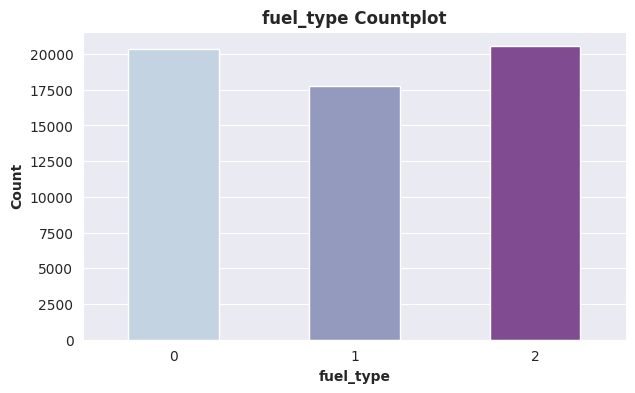

In [28]:
count_plot(df_encoded, 'fuel_type')

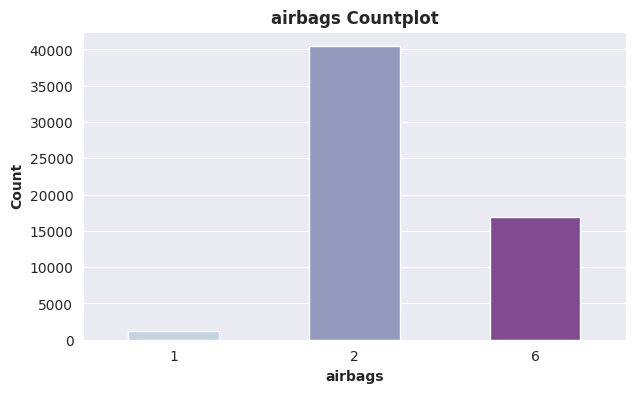

In [29]:
count_plot(df_encoded, 'airbags')

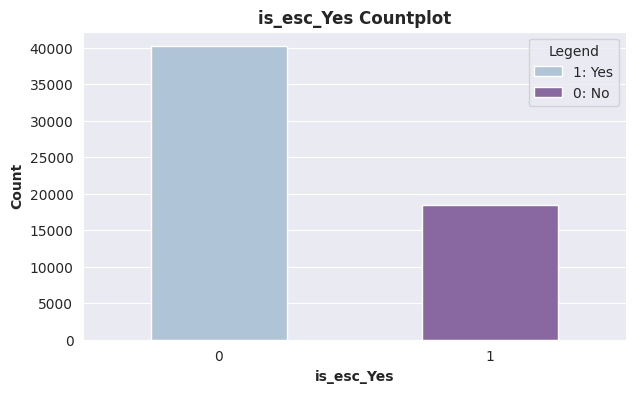

In [30]:
count_plot(df_encoded, 'is_esc_Yes', guide=True)

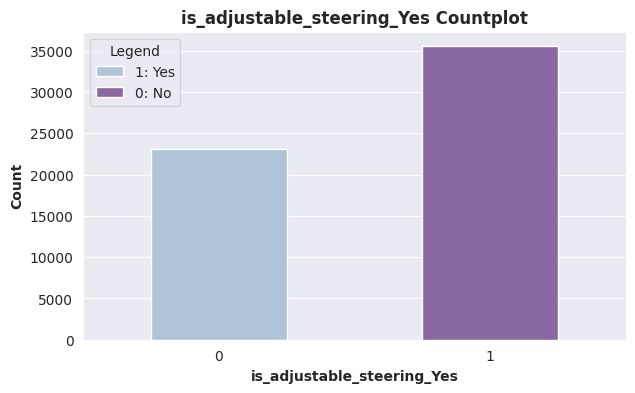

In [31]:
count_plot(df_encoded, 'is_adjustable_steering_Yes', guide=True)

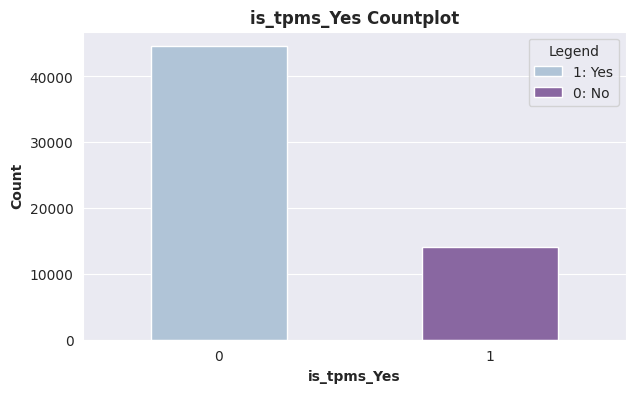

In [32]:
count_plot(df_encoded, 'is_tpms_Yes', guide=True)

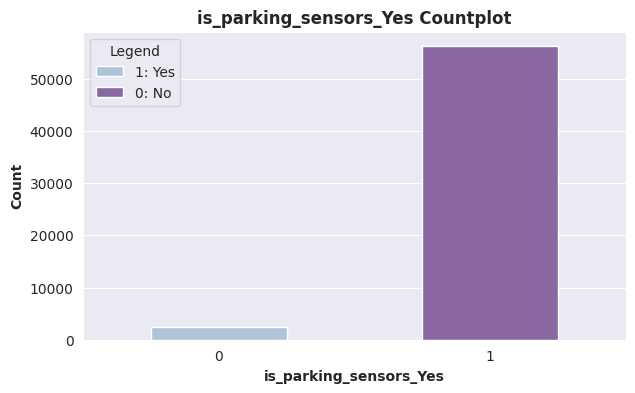

In [33]:
count_plot(df_encoded, 'is_parking_sensors_Yes', guide=True)

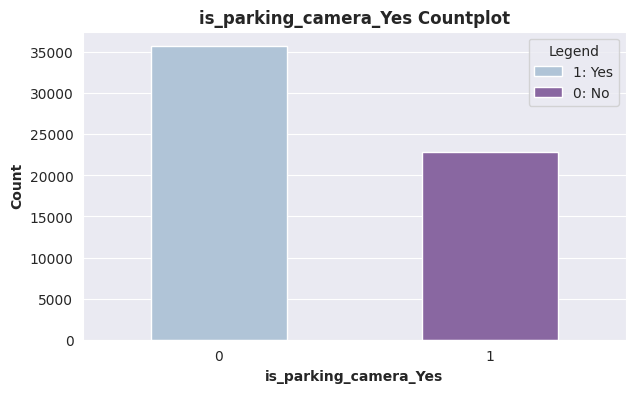

In [34]:
count_plot(df_encoded, 'is_parking_camera_Yes', guide=True)

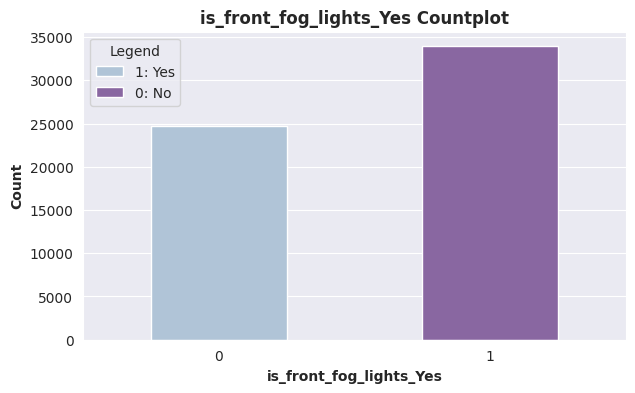

In [35]:
count_plot(df_encoded, 'is_front_fog_lights_Yes', guide=True)

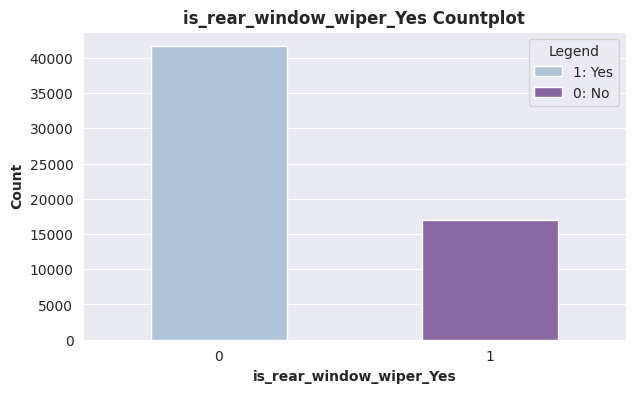

In [36]:
count_plot(df_encoded, 'is_rear_window_wiper_Yes', guide=True)

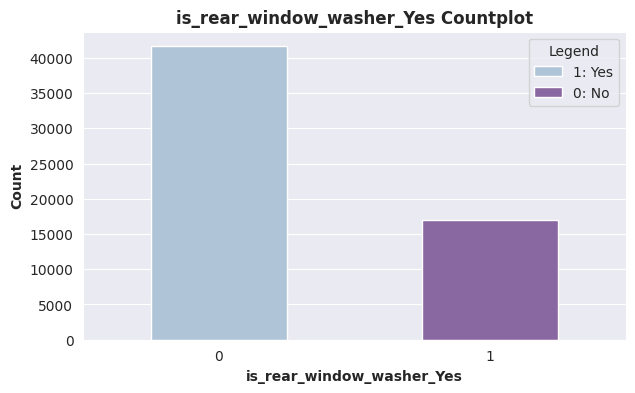

In [37]:
count_plot(df_encoded, 'is_rear_window_washer_Yes', guide=True)

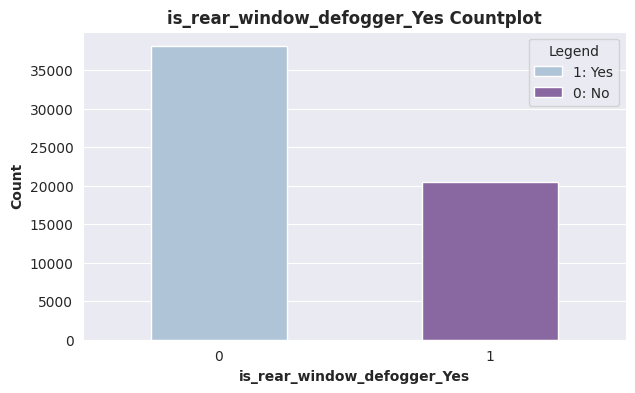

In [38]:
count_plot(df_encoded, 'is_rear_window_defogger_Yes', guide=True)

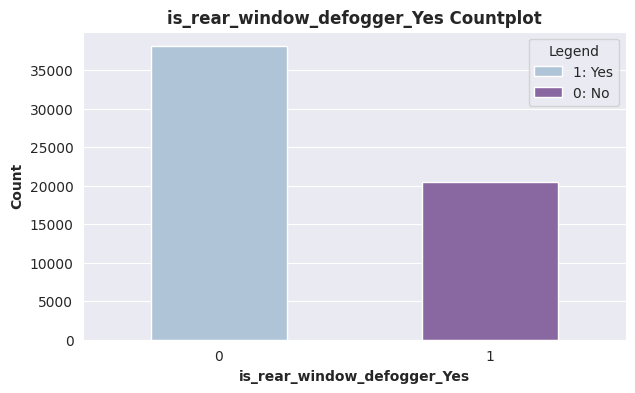

In [39]:
count_plot(df_encoded, 'is_rear_window_defogger_Yes', guide=True)

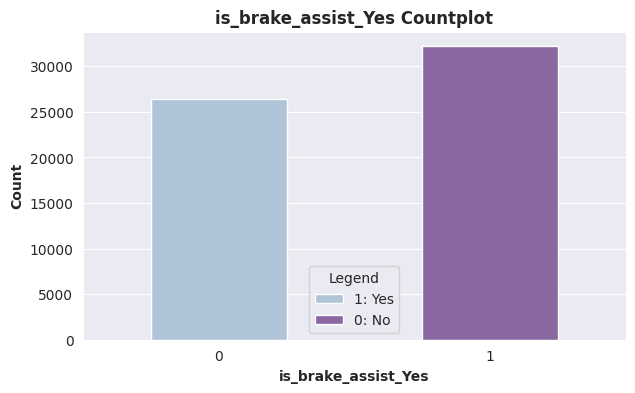

In [40]:
count_plot(df_encoded, 'is_brake_assist_Yes', guide=True)

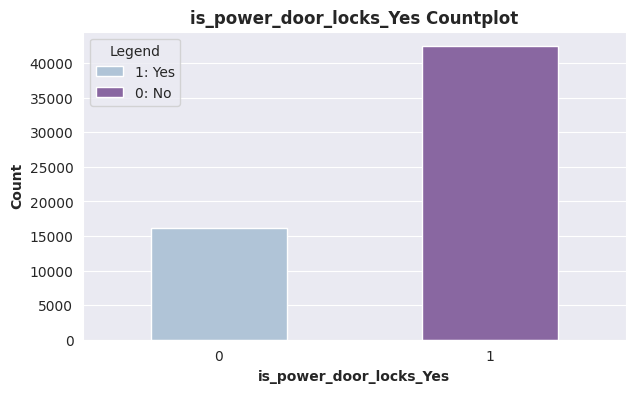

In [41]:
count_plot(df_encoded, 'is_power_door_locks_Yes', guide=True)

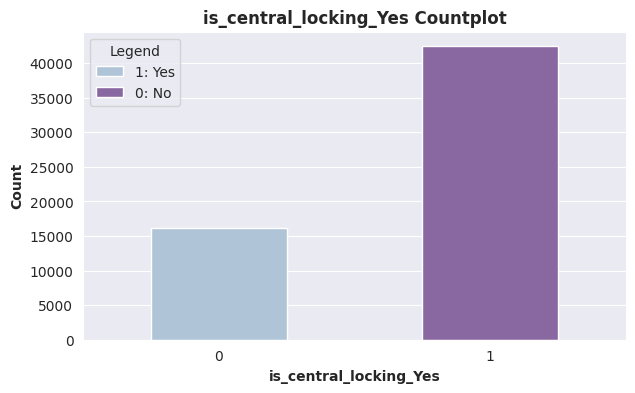

In [42]:
count_plot(df_encoded, 'is_central_locking_Yes', guide=True)

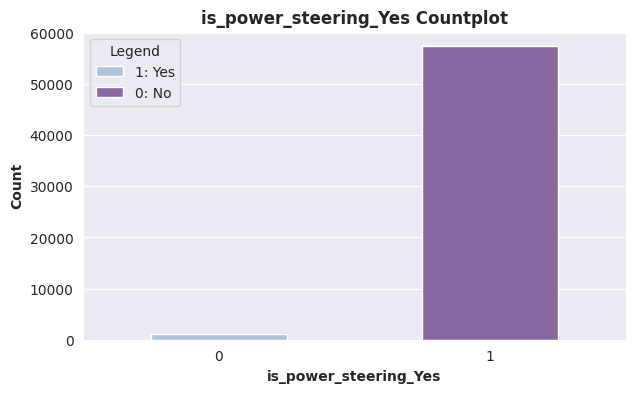

In [43]:
count_plot(df_encoded, 'is_power_steering_Yes', guide=True)

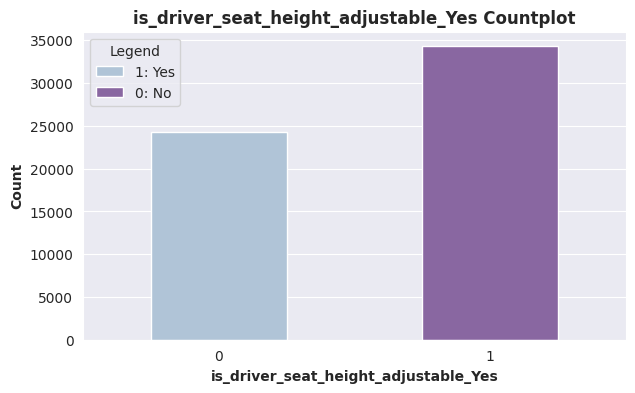

In [44]:
count_plot(df_encoded, 'is_driver_seat_height_adjustable_Yes', guide=True)

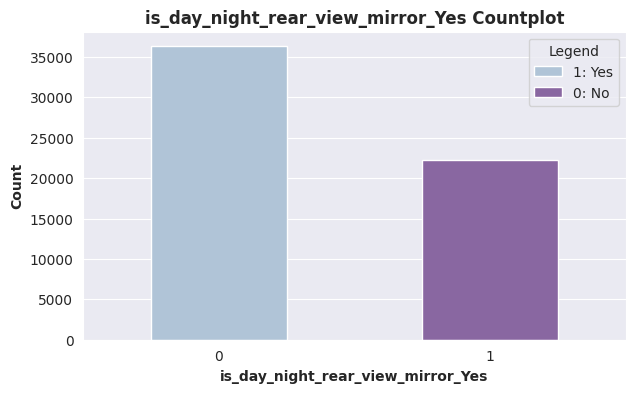

In [45]:
count_plot(df_encoded, 'is_day_night_rear_view_mirror_Yes', guide=True)

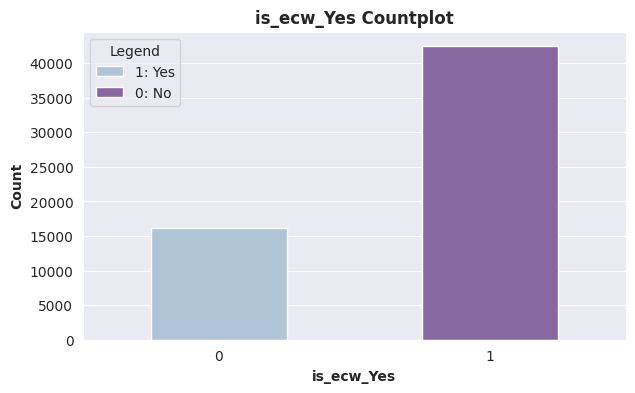

In [46]:
count_plot(df_encoded, 'is_ecw_Yes', guide=True)

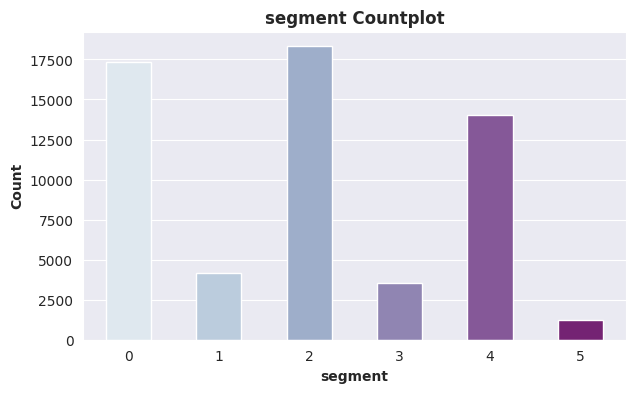

In [47]:
count_plot(df_encoded, 'segment')

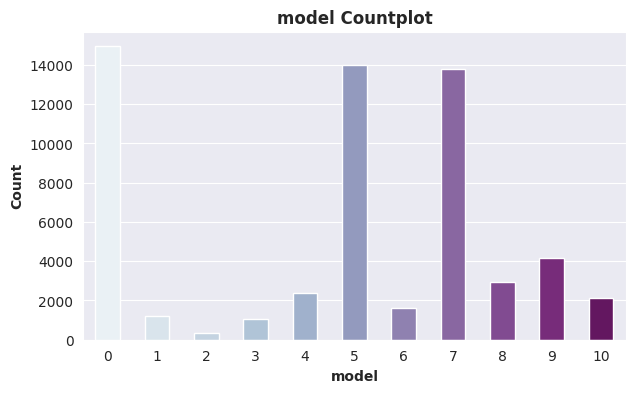

In [48]:
count_plot(df_encoded, 'model')

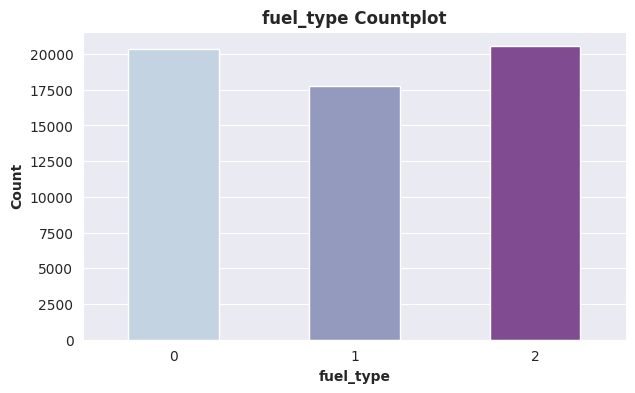

In [49]:
count_plot(df_encoded, 'fuel_type')

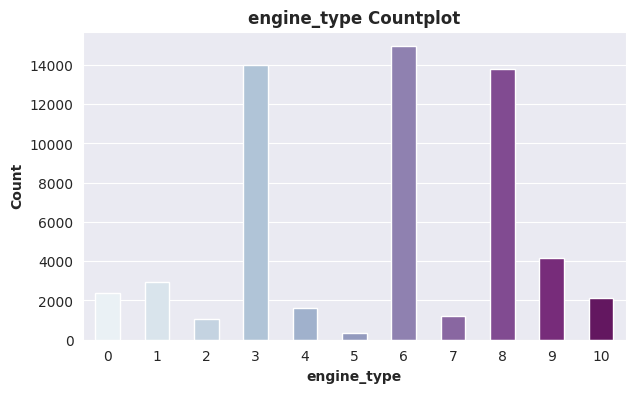

In [50]:
count_plot(df_encoded, 'engine_type')

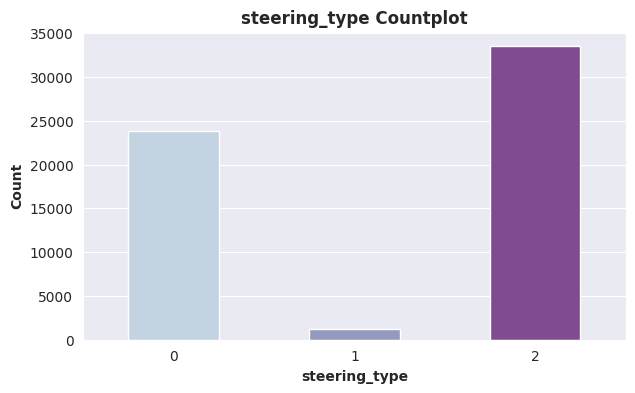

In [51]:
count_plot(df_encoded, 'steering_type')

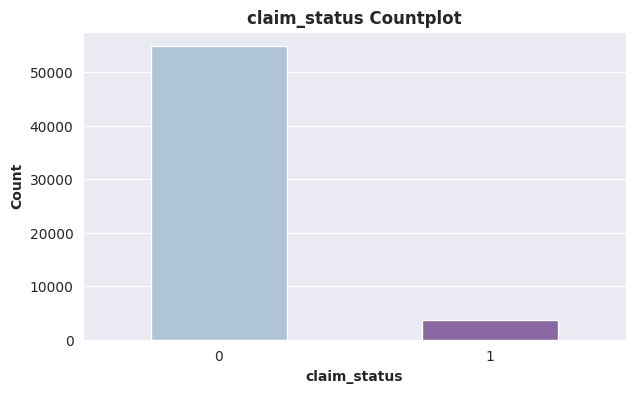

In [52]:
count_plot(df, 'claim_status')

## 6.2 Distributions <a id=6.2></a>

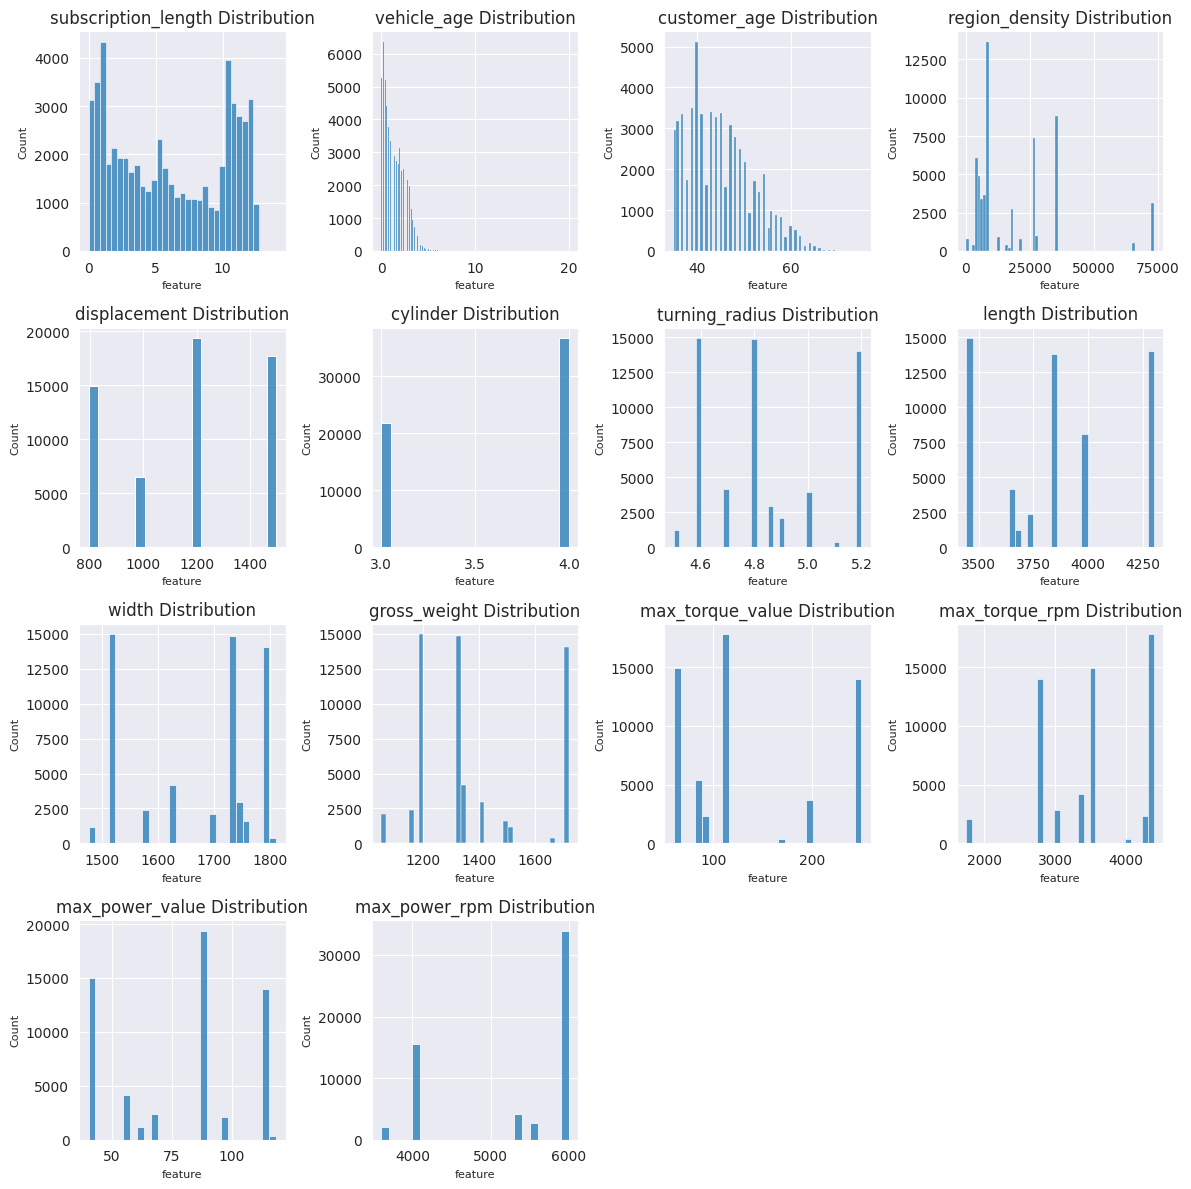

In [53]:
# Select features
int_features = ['subscription_length', 'vehicle_age', 'customer_age',
               'region_density', 'displacement', 'cylinder', 'turning_radius',
               'length', 'width', 'gross_weight', 'max_torque_value', 'max_torque_rpm',
               'max_power_value', 'max_power_rpm']

# Set up the figure for subplots
plt.figure(figsize=(12, 12))
sns.set_style('darkgrid')

# Plot
for idx, feature in enumerate(int_features, 1):
    plt.subplot(4, 4, idx)
    sns.histplot(data=df_encoded, x=feature, bins='auto')
    plt.xlabel(f"feature", fontsize=8)
    plt.ylabel("Count", fontsize=8)
    plt.title(f"{feature} Distribution", fontsize=12)
    plt.tight_layout()

## 6.3 Correlation Matrix <a id=6.3></a>

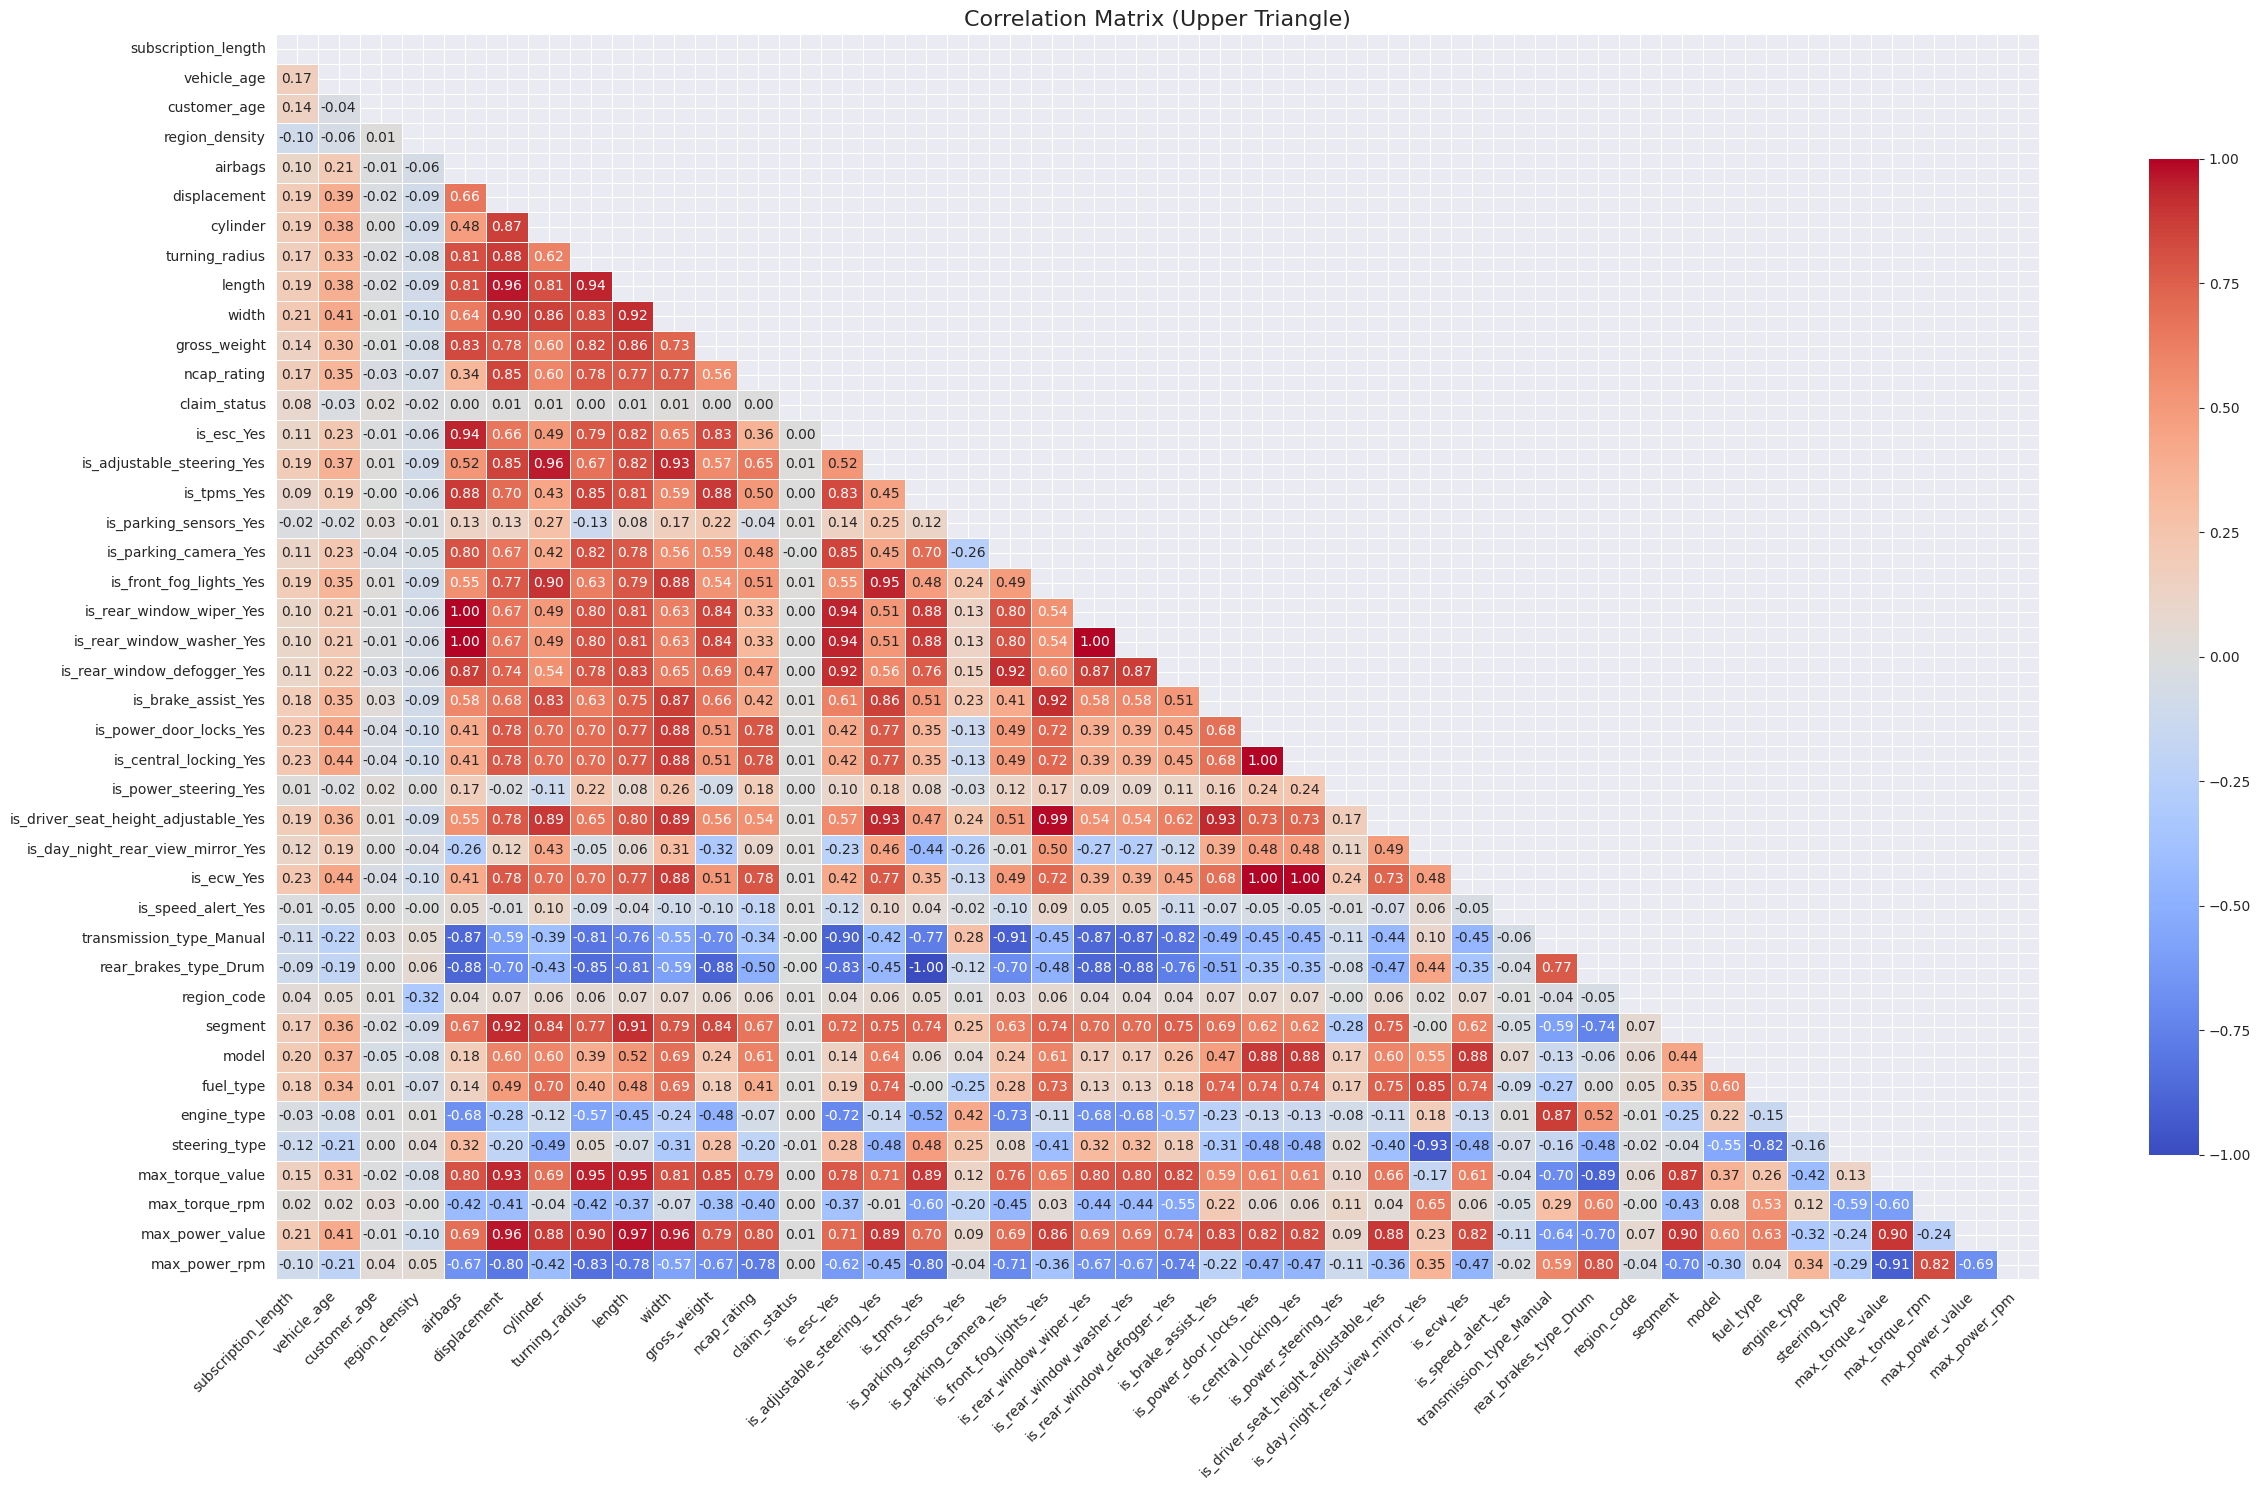

In [54]:
corr_matrix = df_encoded.corr(numeric_only=True)
# Create a mask for the upper triangle (True for the upper triangle)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(25, 15))

# Create a heatmap with the mask and better color formatting
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1, cbar_kws={"shrink": .8})

# Add titles and labels for readability
plt.title("Correlation Matrix (Upper Triangle)", size=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

## 6.4 Boxplot <a id=6.4></a>

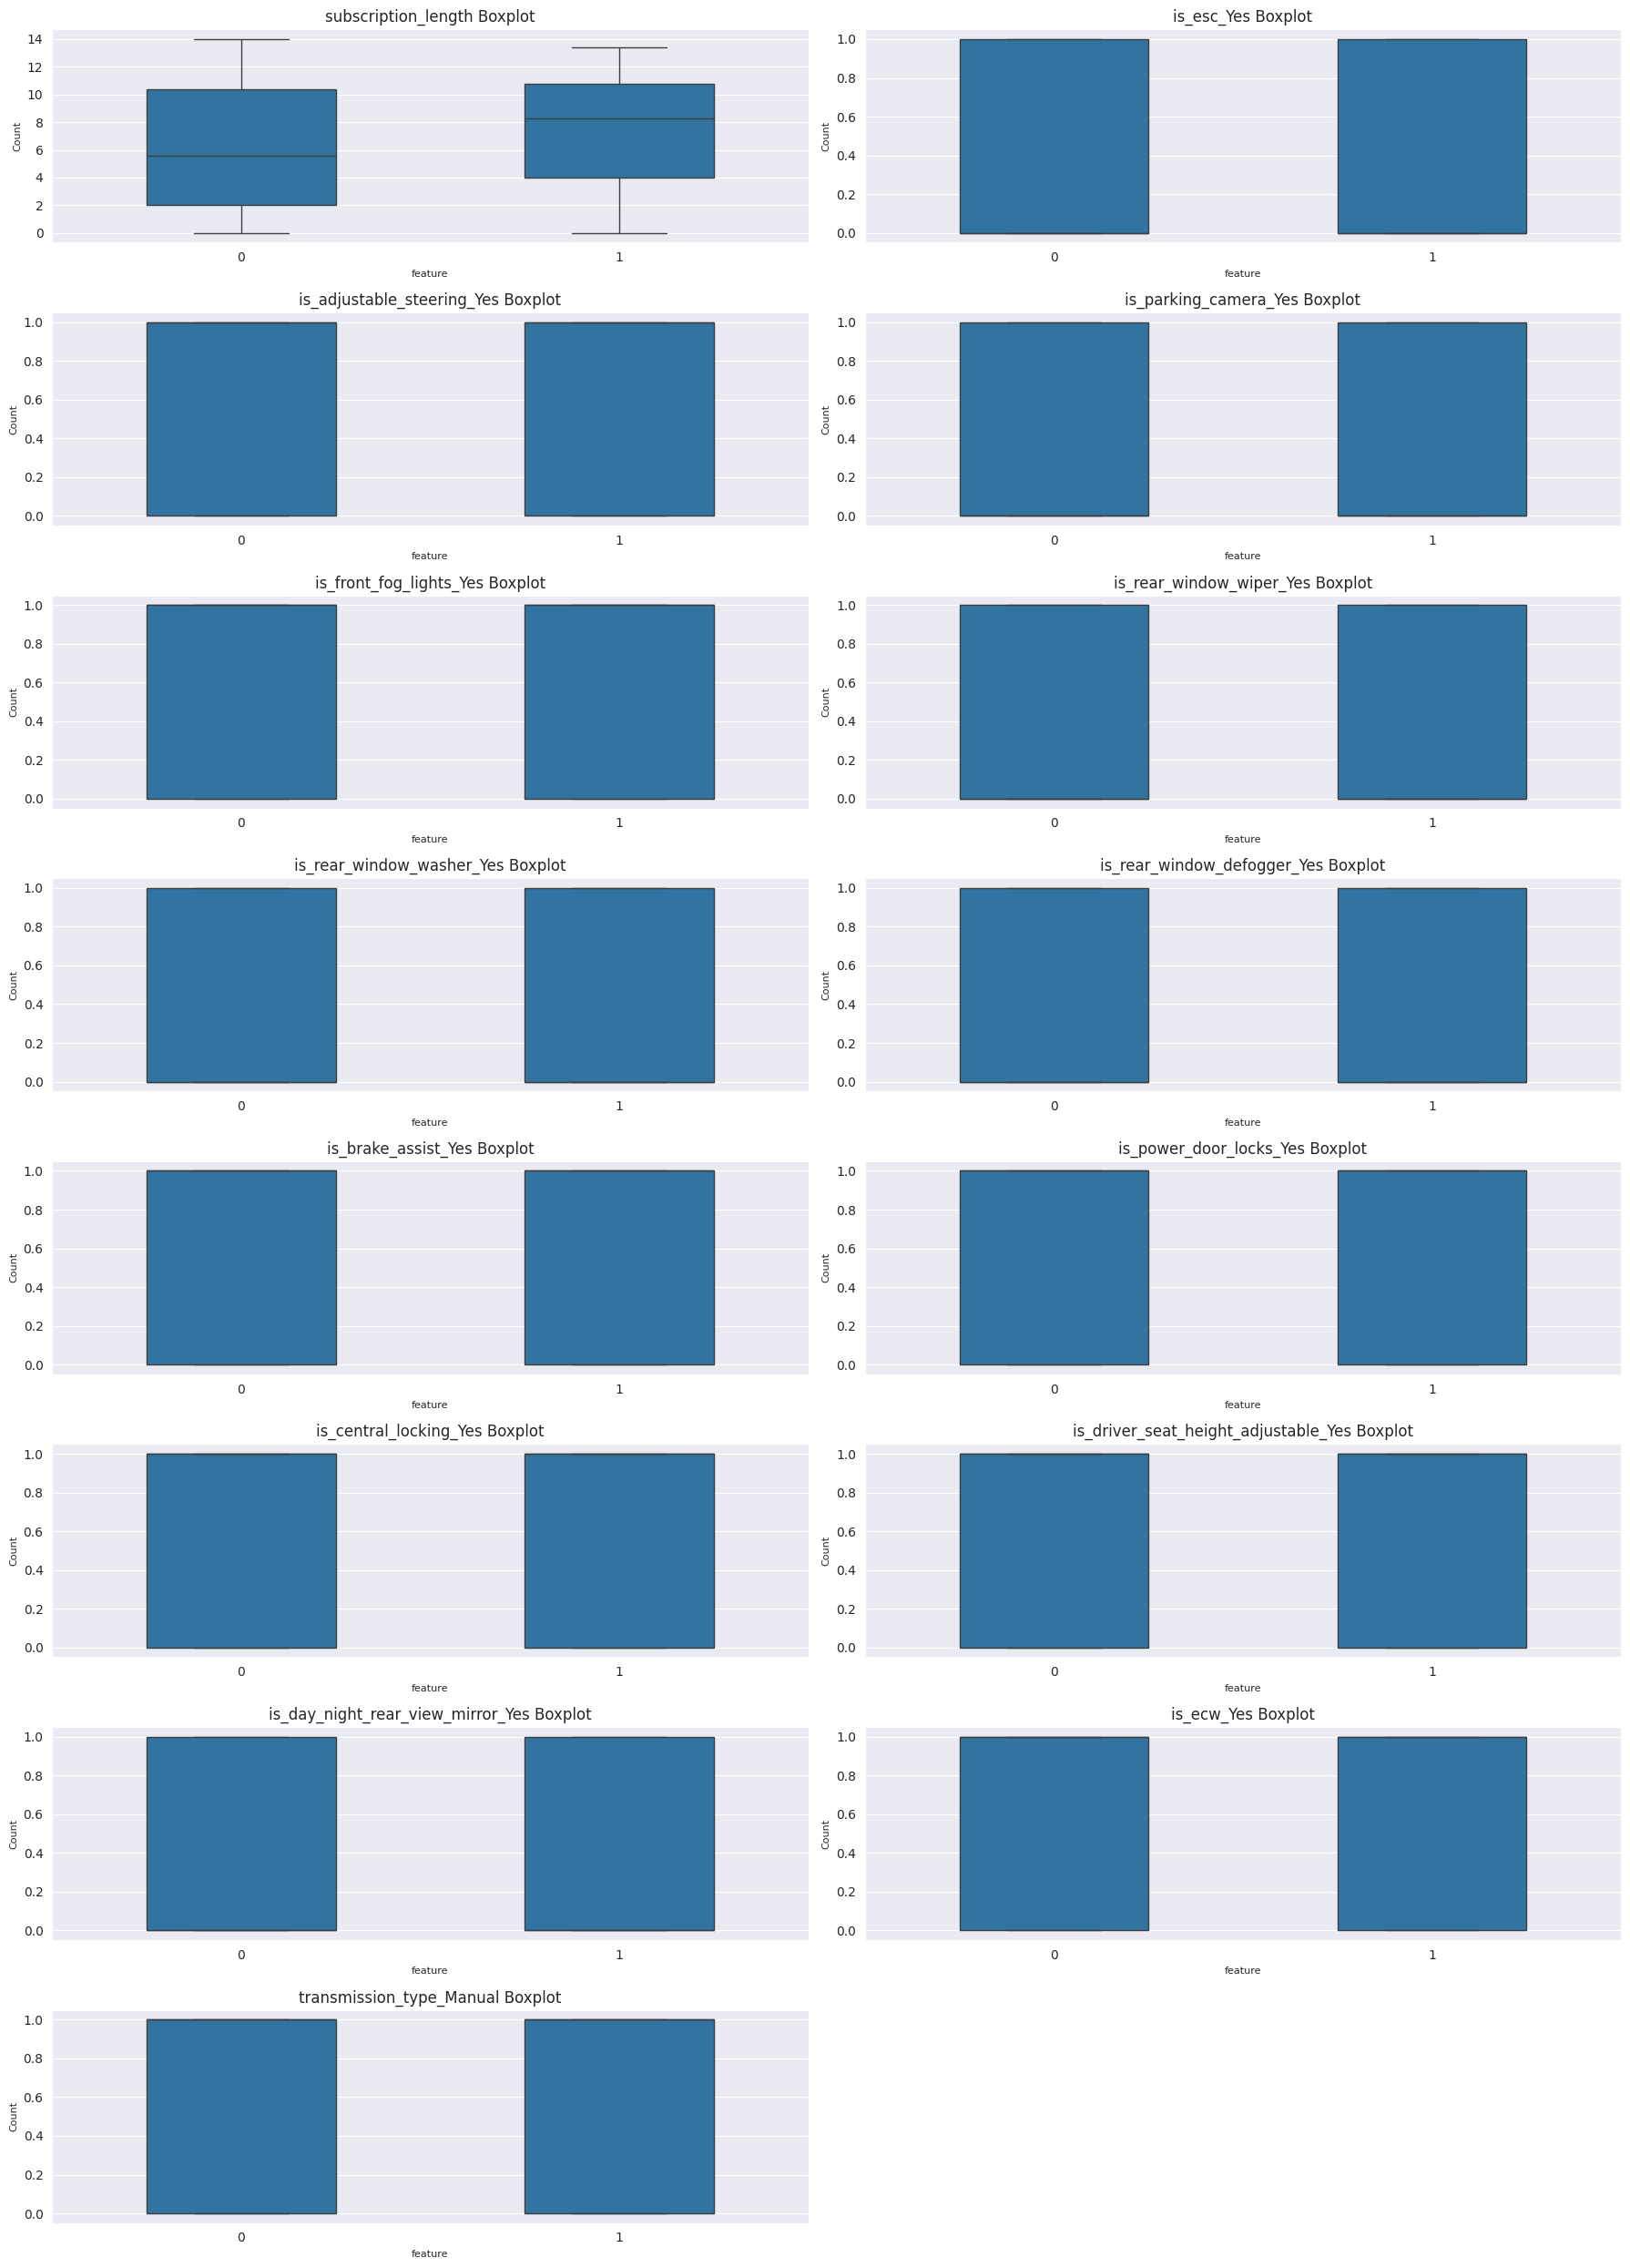

In [55]:
# Select features
int_features = ['subscription_length', 'is_esc_Yes', 'is_adjustable_steering_Yes', 'is_parking_camera_Yes',
       'is_front_fog_lights_Yes', 'is_rear_window_wiper_Yes',
       'is_rear_window_washer_Yes', 'is_rear_window_defogger_Yes',
       'is_brake_assist_Yes', 'is_power_door_locks_Yes',
       'is_central_locking_Yes',
       'is_driver_seat_height_adjustable_Yes',
       'is_day_night_rear_view_mirror_Yes', 'is_ecw_Yes',
       'transmission_type_Manual']

# Set up the figure for subplots
plt.figure(figsize=(18, 25))
sns.set_style('darkgrid')

# Plot
for idx, feature in enumerate(int_features, 1):
    plt.subplot(8, 2, idx)
    sns.boxplot(data=df_encoded, x='claim_status', y=feature, width=0.5)
    plt.xlabel(f"feature", fontsize=8)
    plt.ylabel("Count", fontsize=8)
    plt.title(f"{feature} Boxplot", fontsize=12)
    plt.tight_layout()

**Customers with longer subscription lengths are more likely to file a claim: Since the median and overall subscription lengths tend to be longer for claimants, you could hypothesize that customers who have been with the company longer may be more inclined to file a claim, or their vehicle condition may deteriorate over time.**

_______________________

# 7. Modelling

## 7.1 Spliting Data <a id=7.1></a>

In [56]:
X = df_encoded.drop(['claim_status', 'policy_id'], axis=1)
y = df_encoded['claim_status']

print(f"X Shape: {X.shape}")
print(f"y Shape: {y.shape}")

X Shape: (58592, 41)
y Shape: (58592,)


In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 7.2 Oversampling
__Using SMOTE__

In [58]:
# pip install imblearn

In [59]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

smote = SMOTE(random_state=42)

X_smote, y_smote = smote.fit_resample(X, y)

# Split
X_train_smote, X_test_smote , y_train_smote , y_test_smote = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# Standardization
scaler = StandardScaler()

X_train_smote = scaler.fit_transform(X_train_smote)
X_test_smote = scaler.transform(X_test_smote)

# 7.3 SVC <a id=7.3></a>

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

svc_clf = SVC(C=1, kernel="sigmoid", gamma=5)
svc_clf.fit(X_train_smote, y_train_smote)

In [61]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = svc_clf.predict(X_test_smote)

confusion_matrix(y_test_smote, y_pred)

In [ ]:
print(classification_report(y_test_smote, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.54      0.54     11072
           1       0.54      0.55      0.54     10866

    accuracy                           0.54     21938
   macro avg       0.54      0.54      0.54     21938
weighted avg       0.54      0.54      0.54     21938



## 7.4 RandomForest <a id=7.4></a>

In [62]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)

rf_clf.fit(X_train_smote, y_train_smote)

y_pred_rf = rf_clf.predict(X_test_smote)

confusion_matrix(y_test_smote, y_pred_rf)

array([[9916, 1156],
       [1030, 9836]])

In [63]:
print(classification_report(y_test_smote, y_pred_rf))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90     11072
           1       0.89      0.91      0.90     10866

    accuracy                           0.90     21938
   macro avg       0.90      0.90      0.90     21938
weighted avg       0.90      0.90      0.90     21938



### 7.4.1 RandomForest Hyperparameter Tuning <a id=7.4.1></a>

In [64]:
from sklearn.model_selection import RandomizedSearchCV

rf_tuned = RandomForestClassifier()

params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

random_search_rf = RandomizedSearchCV(estimator=rf_tuned,
                                      param_distributions=params,
                                      n_iter=5, cv=5, random_state=42)


random_search_rf.fit(X_train_smote, y_train_smote)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': [None, 10, 20, 30, 40],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42)

In [65]:
rf_tuned = random_search_rf.best_estimator_

print(random_search_rf.best_params_)

{'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 30}


In [68]:
y_pred_tuned = rf_tuned.predict(X_test_smote)

confusion_matrix(y_test_smote, y_pred_tuned)

array([[9552, 1520],
       [ 994, 9872]])

In [69]:
print(classification_report(y_test_smote, y_pred_tuned))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88     11072
           1       0.87      0.91      0.89     10866

    accuracy                           0.89     21938
   macro avg       0.89      0.89      0.89     21938
weighted avg       0.89      0.89      0.89     21938



## 7.5 XGBoost <a id=7.5></a>

In [70]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()

xgb_clf.fit(X_train_smote, y_train_smote)

y_pred_xgb = xgb_clf.predict(X_test_smote)

print(confusion_matrix(y_test_smote, y_pred_xgb))

print(classification_report(y_test_smote, y_pred_xgb))

[[10706   366]
 [ 1524  9342]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92     11072
           1       0.96      0.86      0.91     10866

    accuracy                           0.91     21938
   macro avg       0.92      0.91      0.91     21938
weighted avg       0.92      0.91      0.91     21938



### 7.5.1 XGBoost Hyperparameter Tunning <a id=8.5.1></a>

In [73]:
# Define the parameter grid

xgb_tuned = XGBClassifier(random_state=42)

param_grid_xgb = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.5, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0]
}

random_search_xgb = RandomizedSearchCV(estimator=xgb_tuned,
                                       param_distributions=param_grid_xgb,
                                       cv=5,
                                       n_iter=5,
                                       random_state=42,
                                       n_jobs=-1)


random_search_xgb.fit(X_train_smote, y_train_smote)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.5, 0.1, 0.2],
                                        'max_depth': [3, 4, 5, 6],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [100, 200, 300, 400],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=42)

In [74]:
best_estimator = random_search_xgb.best_estimator_

print(random_search_xgb.best_params_)

{'subsample': 0.8, 'n_estimators': 300, 'min_child_weight': 3, 'max_depth': 6, 'learning_rate': 0.5}


In [75]:
xgb_tuned = XGBClassifier(**best_estimator.get_params())

xgb_tuned.fit(X_train_smote, y_train_smote)

y_pred_xgb_tuned = xgb_tuned.predict(X_test_smote)

In [76]:
print(confusion_matrix(y_test_smote, y_pred_xgb_tuned))

[[10598   474]
 [ 1225  9641]]


In [79]:
print(classification_report(y_test_smote, y_pred_xgb_tuned))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93     11072
           1       0.95      0.89      0.92     10866

    accuracy                           0.92     21938
   macro avg       0.92      0.92      0.92     21938
weighted avg       0.92      0.92      0.92     21938



# 8. Null Accuracy <a id=8></a>

In [84]:
majority_class_count = df['claim_status'].value_counts().max()
total_samples = len(df)

# Calculate null accuracy
null_accuracy = majority_class_count / total_samples
print(f'Null Accuracy: {null_accuracy:.4f}')

Null Accuracy: 0.9360
